# HISTÓRICO DA GERAÇÃO DE ENERGIA ATÉ 2019

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 

In [21]:
hidreletricas = pd.read_csv('hidreSemItaipu.csv')
itaipu = pd.read_csv('itaipu.csv')

In [22]:
hidreletricas.columns

Index(['Unnamed: 0', 'nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh'],
      dtype='object')

In [24]:
hidre = hidreletricas[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]
itai = itaipu[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]

In [26]:
hidre.tail()

,nomFonteGeracao,anoReferencia,mdaEnergiaDespachadaGWh
15,Hidreletricas exclusive Itaipu,2015,302614.098797
16,Hidreletricas exclusive Itaipu,2016,315303.679650
17,Hidreletricas exclusive Itaipu,2017,311725.060223
18,Hidreletricas exclusive Itaipu,2018,323458.566509
19,Hidreletricas exclusive Itaipu,2019,346025.086955


In [27]:
hidre.columns = ['fonte', 'ano',
       'geracao']
itai.columns = ['fonte', 'ano',
       'geracao']

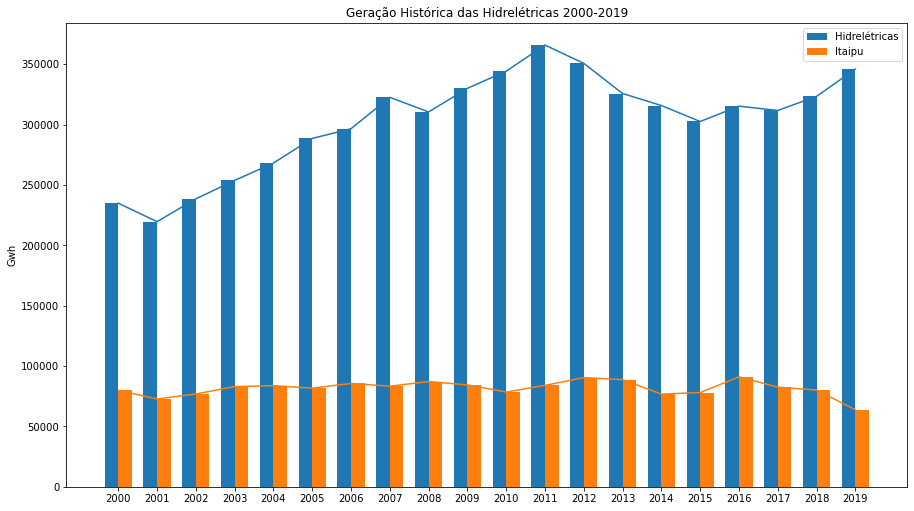

In [31]:
import matplotlib.pyplot as plt
import numpy as np


labels = hidre['ano']
hidreletricas = hidre['geracao']
itaipu = itai['geracao']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12.8, 7.2))
rects1 = ax.bar(x - width/2, hidreletricas, width, label='Hidrelétricas')
rects2 = ax.bar(x + width/2, itaipu, width, label='Itaipu')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gwh')
ax.set_title('Geração Histórica das Hidrelétricas 2000-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot(hidreletricas)
plt.plot(itaipu)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.grid()
plt.show()

# Capacidade instalada entre 1999 e 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tabela = pd.read_csv('AcrescimoAnualPotencia.csv')

In [3]:
tabela.drop(columns=['ideAcrescimoAnualPotencia','mesReferencia','dthProcessamento'], inplace=True)

In [4]:
tabela.columns = ['Potencia média Mw', 'Acrescimo na potencia Mw', 'Ano']

In [5]:
tabela.head(10)

,Potencia média Mw,Acrescimo na potencia Mw,Ano
0,67946.00,0.00,1999
1,72299.00,4352.00,2000
2,74876.00,2577.00,2001
3,80314.90,5438.89,2002
4,83807.25,3492.35,2003
5,88629.01,4821.76,2004
6,92865.52,4236.51,2005
7,96294.46,3428.94,2006
8,100352.44,4057.97,2007
9,102609.72,2257.28,2008


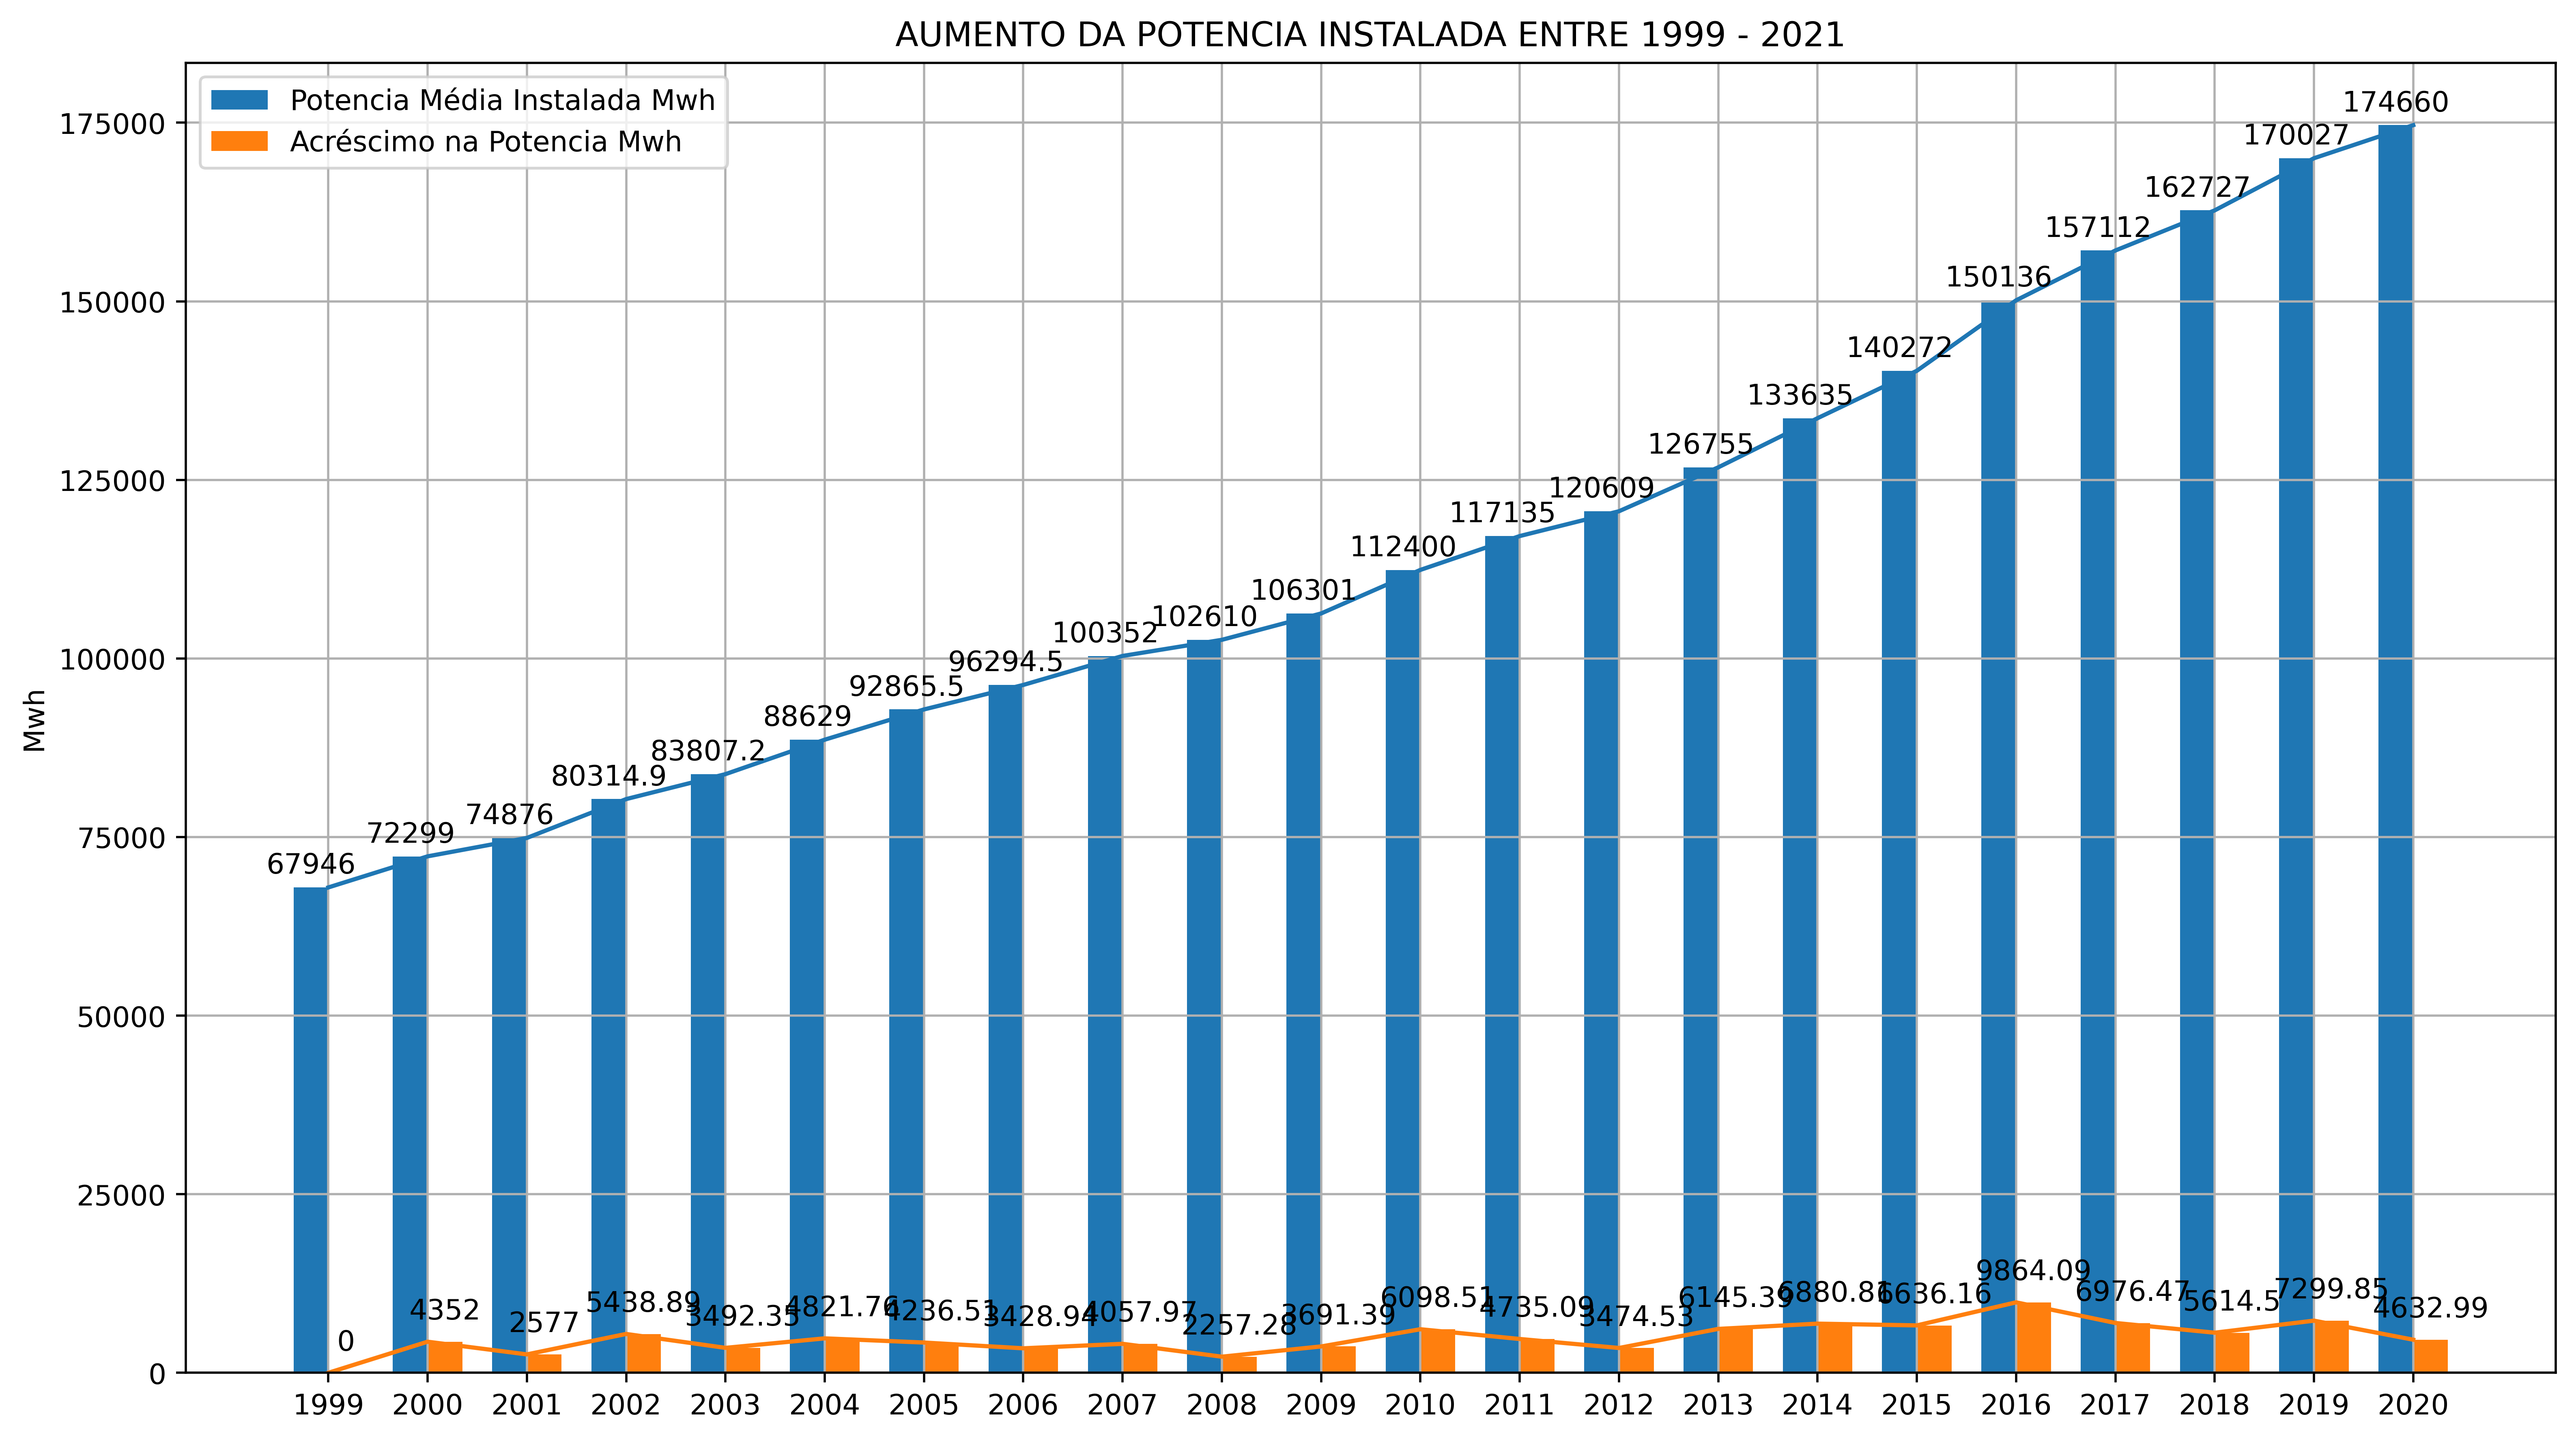

<Figure size 432x288 with 0 Axes>

In [10]:
labels = tabela['Ano']
hidreletricas = tabela['Potencia média Mw']
itaipu = tabela['Acrescimo na potencia Mw']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=500)
rects1 = ax.bar(x - width/2, hidreletricas, width, label='Potencia Média Instalada Mwh')
rects2 = ax.bar(x + width/2, itaipu, width, label='Acréscimo na Potencia Mwh')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mwh')
ax.set_title('AUMENTO DA POTENCIA INSTALADA ENTRE 1999 - 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot(hidreletricas)
plt.plot(itaipu)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=6)

fig.tight_layout()
plt.grid()
plt.show()
plt.savefig('acrescimoDePotencia.png')

# GERAÇÃO TOTAL ENTRE 2000 - 2020

In [11]:
geracaoFonte = pd.read_csv('anoReferencia.csv')

In [21]:
geracaoFonte.tail(10)

,nomFonteGeracao,anoReferencia,mdaEnergiaDespachadaGWh
203,Residuos Processos Industriais,2014,5699.290000
204,Residuos Processos Industriais,2015,6474.084545
205,Residuos Processos Industriais,2016,8632.847214
206,Residuos Processos Industriais,2017,10483.436474
207,Residuos Processos Industriais,2018,10360.136166
208,Residuos Processos Industriais,2019,9514.049608
209,Residuos Processos Industriais,2020,4778.288160
210,Solar Fotovoltaica,2017,524.219052
211,Solar Fotovoltaica,2018,2526.204816
212,Solar Fotovoltaica,2019,4330.705710


In [48]:
total = geracaoFonte.groupby(['anoReferencia']).sum()

In [49]:
total.to_csv('geracaoTotal.csv')

In [60]:
fonte = pd.read_csv('geracaoTotal.csv')

fonte.columns = ['ano', 'média despachada no sistema em Gwh']

In [61]:
fonte.tail(10)

,ano,média despachada no sistema em Gwh
11,2011,502197.879759
12,2012,525126.254860
13,2013,534883.706579
14,2014,542067.975188
15,2015,541408.054225
16,2016,539269.671910
17,2017,550663.741599
18,2018,549350.688761
19,2019,566309.973756
20,2020,645900.000000


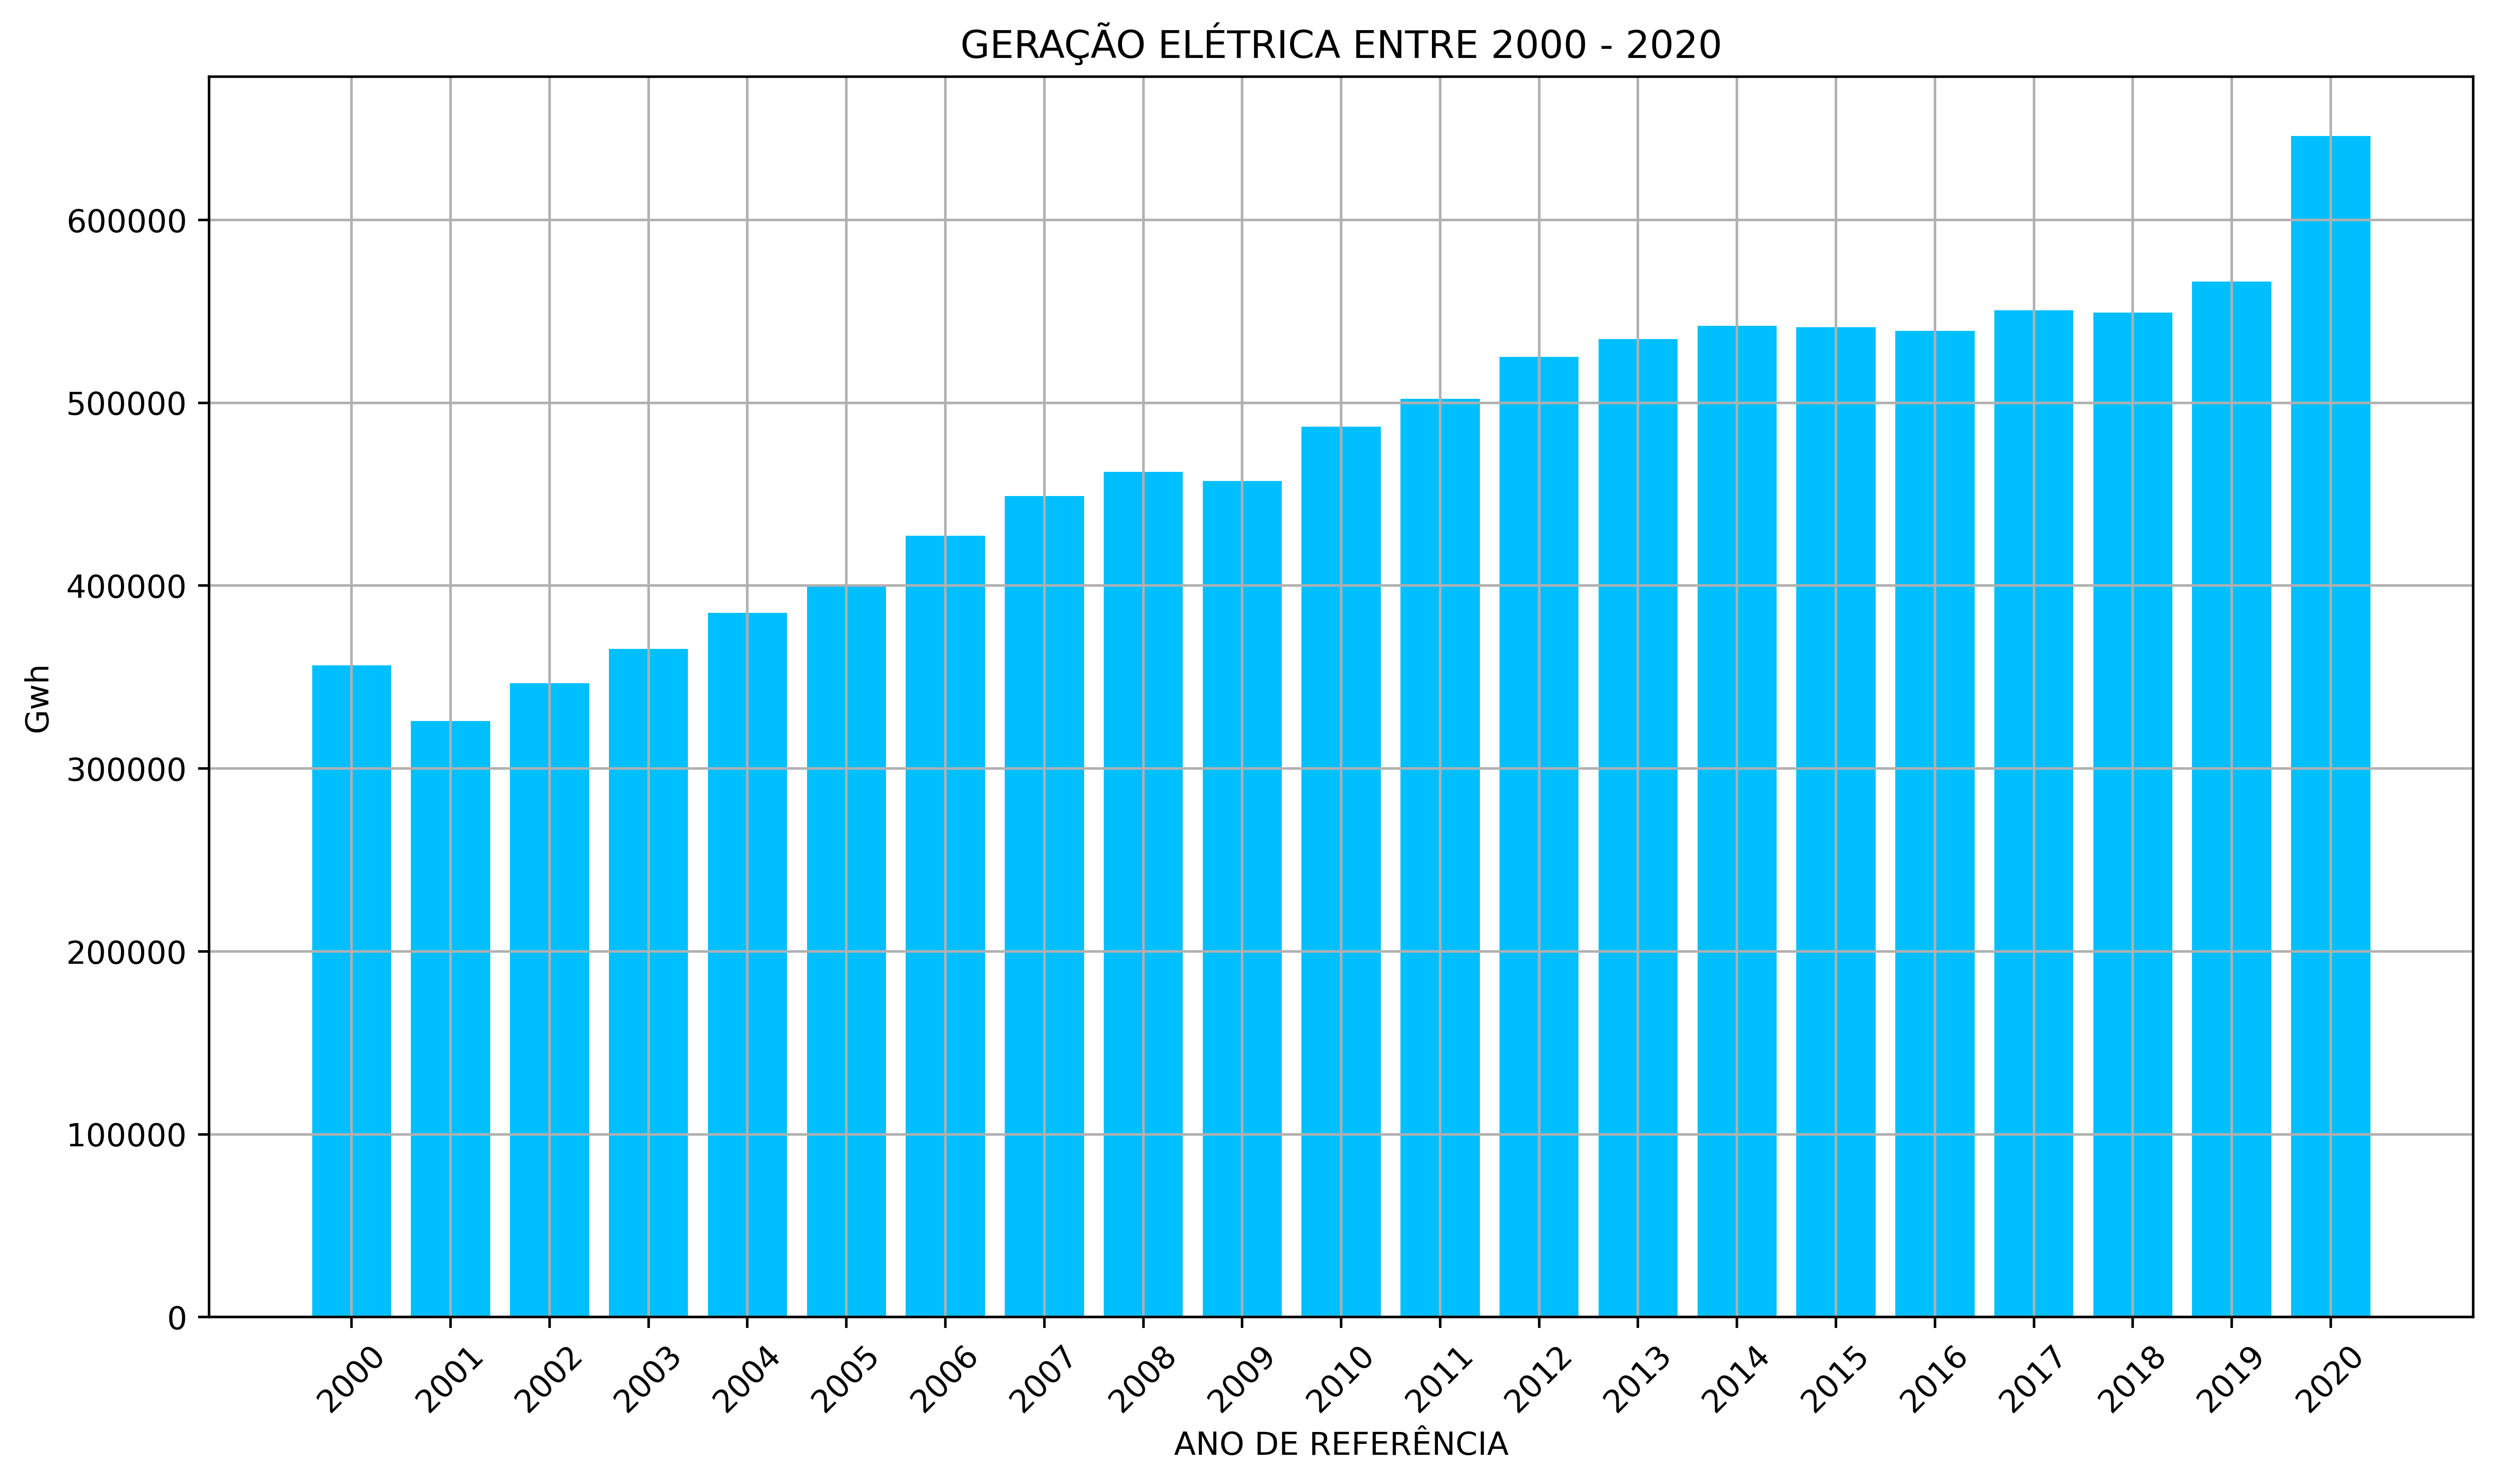

In [70]:
fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=500)
plt.bar(fonte['ano'], fonte['média despachada no sistema em Gwh'], color='#00BFFF')
plt.xticks(fonte['ano'])
plt.xticks(rotation=45)
plt.xlabel('ANO DE REFERÊNCIA')
plt.ylabel('Gwh')
plt.title('GERAÇÃO ELÉTRICA ENTRE 2000 - 2020')
plt.grid()
plt.show()

# b) Manipulando termoelétrica a partir de biomassa vegetal

In [5]:
termos = pd.read_csv('biomass.csv')
termos.tail()

,Unnamed: 0,nomFonteGeracao,anoReferencia,mdaEnergiaDespachadaGWh
16,16,Biomassas,2016,7536.164460
17,17,Biomassas,2017,9026.314418
18,18,Biomassas,2018,8746.024599
19,19,Biomassas,2019,9482.297997
20,20,Biomassas,2020,3862.653600


In [6]:
termo = termos[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]
termo.columns = ['fonte', 'ano',
       'geracao']

In [35]:
termo.head(20)

,fonte,ano,geracao
0,Biomassas,2000,358.885600
1,Biomassas,2001,0.000000
2,Biomassas,2002,0.390353
3,Biomassas,2003,0.489900
4,Biomassas,2004,0.077000
5,Biomassas,2005,0.130800
6,Biomassas,2006,0.000000
7,Biomassas,2007,0.000000
8,Biomassas,2008,113.876690
9,Biomassas,2009,76.229633


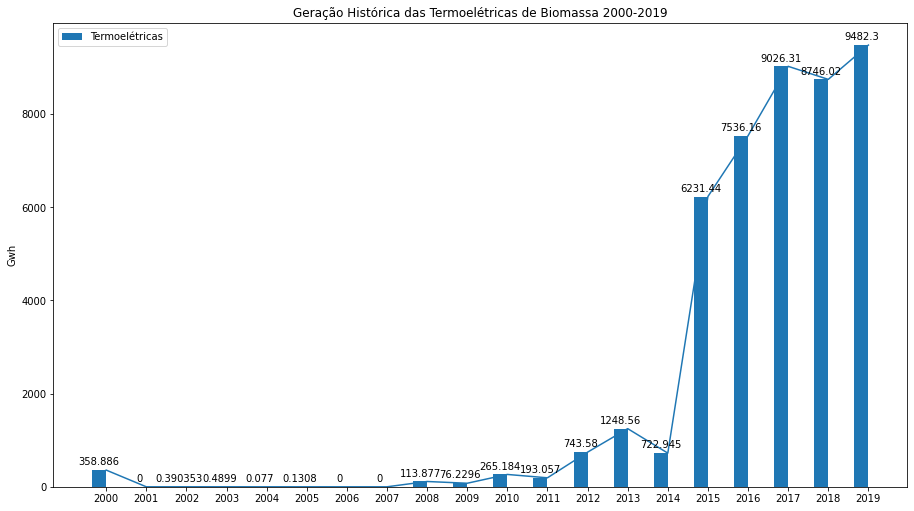

In [11]:
labels = termo['ano']
hidreletricas = termo['geracao']
#itaipu = itai['geracao']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12.8, 7.2))
rects1 = ax.bar(x - width/2, hidreletricas, width, label='Termoelétricas')
#rects2 = ax.bar(x + width/2, itaipu, width, label='Itaipu')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gwh')
ax.set_title('Geração Histórica das Termoelétricas de Biomassa 2000-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot(hidreletricas)
#plt.plot(itaipu)

ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.grid()
plt.show()

## Questão 2

In [12]:
petroleo = pd.read_csv('oleoDiesel.csv')
gas = pd.read_csv('gas.csv')
carvao = pd.read_csv('carvao.csv')

In [14]:
petroleo.head()

,Unnamed: 0,nomFonteGeracao,anoReferencia,mdaEnergiaDespachadaGWh
0,168,Oleo Diesel / Combustivel,2000,1407.511471
1,169,Oleo Diesel / Combustivel,2001,1165.939292
2,170,Oleo Diesel / Combustivel,2002,528.295398
3,171,Oleo Diesel / Combustivel,2003,265.396622
4,172,Oleo Diesel / Combustivel,2004,834.130245


In [18]:
petroleo2 = petroleo[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]
gas2 = gas[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]
carvao2 = carvao[['nomFonteGeracao', 'anoReferencia',
       'mdaEnergiaDespachadaGWh']].iloc[0:20]
petroleo2.columns = ['fonte', 'ano',
       'geracao']
gas2.columns = ['fonte', 'ano',
       'geracao']
carvao2.columns = ['fonte', 'ano',
       'geracao']

In [19]:
petroleo2.tail()

,fonte,ano,geracao
15,Oleo Diesel / Combustivel,2015,20326.711098
16,Oleo Diesel / Combustivel,2016,7837.091053
17,Oleo Diesel / Combustivel,2017,9254.371950
18,Oleo Diesel / Combustivel,2018,6103.918949
19,Oleo Diesel / Combustivel,2019,2051.841361


In [27]:
len(petroleo2['ano'])

20

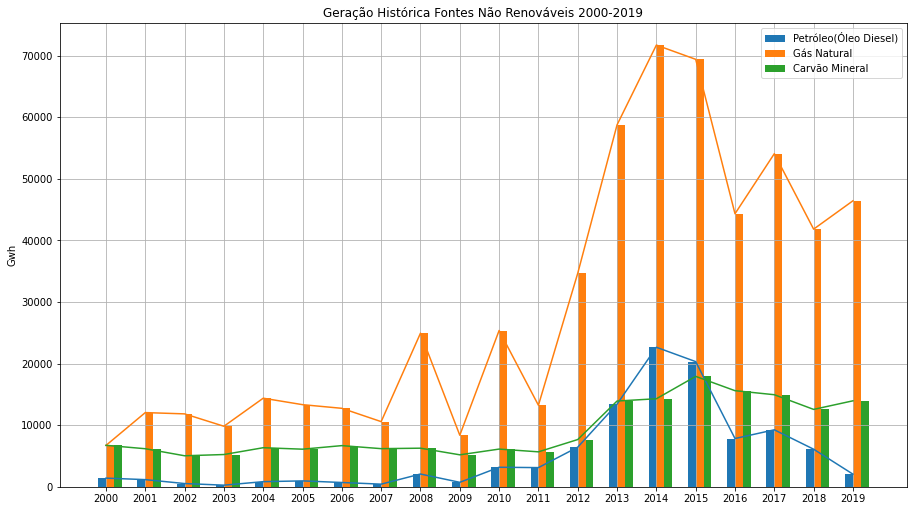

In [36]:
labels = petroleo2['ano']
p = petroleo2['geracao']
g = gas2['geracao']
carvao1 = carvao2['geracao']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(12.8, 7.2))
rects1 = ax.bar(x - width/2, p, width, label='Petróleo(Óleo Diesel)')
rects2 = ax.bar(x + width/2, g, width, label='Gás Natural')
rects3 = ax.bar(x + width*1.5, carvao1, width, label='Carvão Mineral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gwh')
ax.set_title('Geração Histórica Fontes Não Renováveis 2000-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot(p)
plt.plot(g)
plt.plot(carvao1)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.grid()
plt.show()

In [37]:
data = pd.read_csv('dadosPizza.csv')

In [44]:
data.head

Index(['fonte', 'energia'], dtype='object')

In [52]:
data.head(14)

,fonte,energia
1,Carvao,4704.34968
4,Gas Natural,18044.49840
8,Oleo Diesel / Combustivel,437.21208


In [51]:
data.drop([0,2,3,5,6,7,9,10], inplace=True)

In [60]:
data.to_csv('data.csv')

KeyError: 0

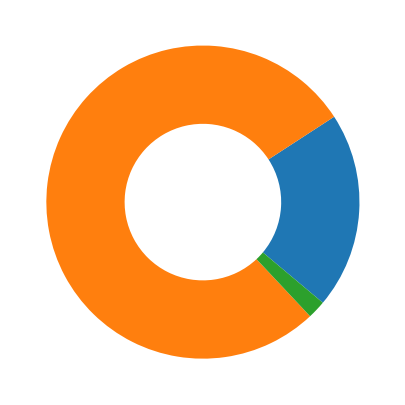

In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

dados = data['energia']
eixo = data['fonte']

fig, ax = plt.subplots(figsize=(12.8, 7.2), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absoluto = pct*100/allvals.sum()
    return "{:.1f}%".format(absoluto)

recipe = dados.apply(lambda pct: func(pct, dados))


wedges, texts = ax.pie(dados, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.legend(wedges, eixo,
          title="FONTES DE ENERGIA",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title(f'GERAÇÃO DE ENERGIA NOS 6 PRIMEIROS MESES\nTOTAL = {dados.sum()} Gwh')
plt.show()